In [62]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [63]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer


In [64]:
data = pd.read_csv('/content/encoded_car_data.csv')

In [65]:
data.head(5)

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


In [66]:
data.dtypes.value_counts()

,count
float64,36


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

## Data Preparation

In [68]:
X = data.drop(columns=['price'])
y = data['price'].copy()

## Train Test Split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Model Building and Evaluation

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
predicted =lr.predict(X_test)

In [73]:
lr.score(X_train,y_train)

0.9262722224294516

In [74]:
lr.score(X_test,y_test)

0.8471124710243334

In [75]:
print(r2_score(y_true=y_test, y_pred=predicted))

0.8471124710243334


In [76]:
mse = mean_squared_error(y_true=y_test, y_pred=predicted)
rmse = np.sqrt(mse)
rmse

np.float64(3254.645517178902)

In [77]:
some_data = X.iloc[:3]
some_labels = y.iloc[:3]

In [78]:
print("Predictions:", lr.predict(some_data))

Predictions: [13103.86103074 13103.86103074 15082.19838078]


In [79]:
print("Labels:", list(some_labels))

Labels: [13495.0, 16500.0, 16500.0]


In [80]:
predicted =lr.predict(X_test)
predicted

array([27653.38245478, 21441.31479664, 10767.8520039 , 12148.7512489 ,
       26101.40583166,  5426.80432933,  8110.27396556,  7548.58119614,
       10107.54515847,  9477.91117811, 17334.65744459,  7255.06974389,
       16452.09977343, 10813.14511416, 39693.32752751,  5540.30783255,
        2463.9057561 , 15703.92568748, 10786.9743237 , 11454.56938015,
       10844.84454048, 15782.89095382, 10532.47553629,  3624.24154368,
        7009.01749952, 28652.67185133, 18375.06198726, 15177.15913223,
        4450.97616893, 16390.14301538, 26765.15308234,  5819.00498612,
        4887.02200307, 16631.17988369,  8385.97764569, 30408.88139305,
       12369.99549094, 12979.36921397,  6297.05599512, 16138.13949885,
        8143.22313381, 15099.30290869, 14726.74569321,  5250.90493393,
        6252.18654135,  9120.52487064,  5819.00498612,  7233.27501145,
       16689.33997987, 15561.36906637,  5043.85696648, 21859.00841174,
        7104.13996016, 11434.86263799,  4387.78965369, 16510.10892965,
      

In [81]:
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
pipe.fit(X_train,y_train)
pipe

Pipeline(steps=[('ss', StandardScaler()), ('lr', LinearRegression())])

In [82]:
pipe.score(X_train,y_train)

0.9262722224294516

In [83]:
pipe.score(X_test,y_test)

0.8419174509630336

## Exercise 1
Create a pipeline object called pipe1, replace standardization with normalization. Calculate the R^2
 using the built-in method score and for RMSE, using mean_squared_error method.

In [84]:
pipe_1 = Pipeline([('nn',Normalizer() ),('lr', LinearRegression())])
pipe_1.fit(X_train, y_train)


pipe_1.score(X_train,y_train)
pipe_1.score(X_test,y_test)


pred =pipe_1.predict(X_test)


mse = mean_squared_error(y_true=y_test, y_pred=pred)
rmse = np.sqrt(mse)
rmse

np.float64(2936.0617387185503)

## One feature

In [85]:
features=list(X)
features

['diesel',
 'gas',
 'std',
 'turbo',
 'convertible',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 '4wd',
 'fwd',
 'rwd',
 'dohc',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 'eight',
 'five',
 'four',
 'six',
 'three',
 'twelve',
 'two',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'carlength',
 'carwidth',
 'citympg',
 'highwaympg']

In [86]:
R_2=[]
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])

for feature in features:
    pipe.fit(X_train[[feature]],y_train)
    R_2.append(pipe.score(X_train[[feature]],y_train))



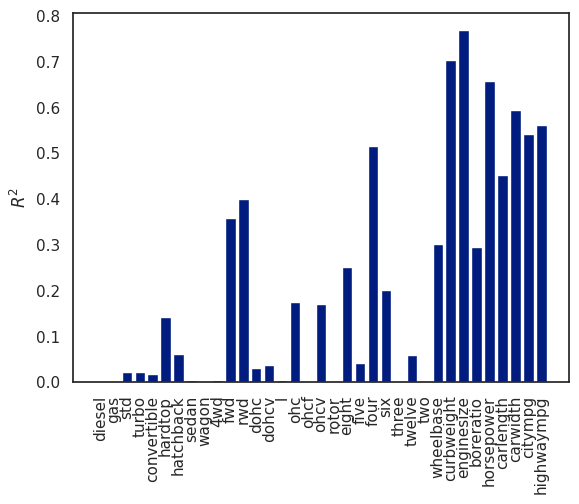

In [87]:
plt.bar(features,R_2)
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.show()

In [88]:
best=features[np.argmax(R_2)]
best

'enginesize'

In [89]:
pipe.fit(X[[best]],y)

Pipeline(steps=[('ss', StandardScaler()), ('lr', LinearRegression())])

## Exercise 2
In this Exercise, find the best feature using the test data, without standardization.

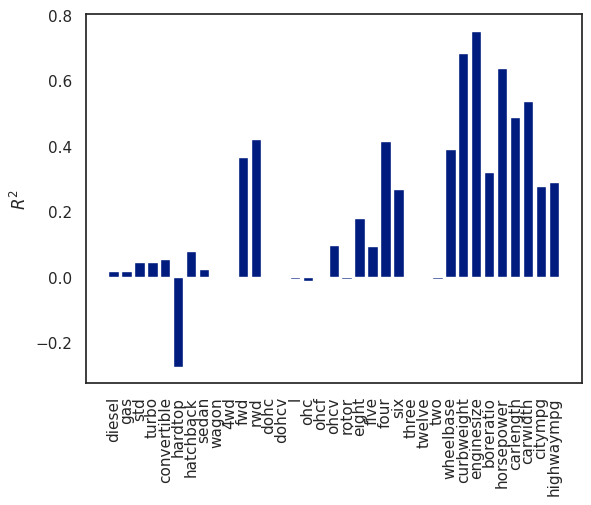

enginesize


In [90]:
R_2=[]

for feature in features:
      lr.fit(X_train[[feature]], y_train)
      R_2.append(lr.score(X_test[[feature]],y_test))
best=features[np.argmax(R_2)]
plt.bar(features,R_2)
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.show()
best=features[np.argmax(R_2)]
print(best)

## K Fold Cross Validation

In [91]:
N=len(X)
N

205

In [92]:
lr = LinearRegression()

In [93]:
scores = cross_val_score(lr, X, y, scoring ="r2", cv=3)

In [94]:
scores

array([ 0.81523496,  0.72623558, -0.08699892])

In [95]:
def display_scores(scores, print_=False):

    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [96]:
display_scores(scores)

Scores: [ 0.81523496  0.72623558 -0.08699892]
Mean: 0.4848238747989147
Standard deviation: 0.4059689683470404


## Exercise 3
In this Exercise, compute the cross validation scores for 5 folds, using the linear regression object lr and neg_mean_squared_error method for scoring.

In [97]:
scores = cross_val_score(lr, X ,y, scoring ="neg_mean_squared_error", cv=5)
lr_scores = np.sqrt(-scores)
display_scores(lr_scores)

Scores: [ 3155.3045326  11357.74643811  3064.27761261  5629.10614669
  5559.42726809]
Mean: 5753.172399620466
Standard deviation: 3014.738874070086


In [98]:
n_splits=2
kf = KFold(n_splits = n_splits)

In [99]:
y = data['price'].copy()
X = data.drop(columns=['price'])
R_2 = np.zeros((n_splits,1))
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
n=0
for k,(train_index, test_index) in enumerate(kf.split(X,y)):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test =X.iloc[train_index],X.iloc[test_index]

    y_train, y_test=y[train_index],y[test_index]
    pipe.fit(X_train,y_train)
    n=+1
    R_2[k]=pipe.score(X_test, y_test)

TRAIN: [103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204]
TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35


In [100]:
R_2.mean()

np.float64(0.39093762153226475)

In [101]:
n_splits=3
kf = KFold(n_splits = n_splits)
y = data['price'].copy()
X = data.drop(columns=['price'])
R_2=np.zeros((n_splits,1))
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
n=0
for k,(train_index, test_index) in enumerate(kf.split(X,y)):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test =X.iloc[train_index],X.iloc[test_index]

    y_train, y_test=y[train_index],y[test_index]
    pipe.fit(X_train,y_train)
    n=+1
    R_2[k]=pipe.score(X_test, y_test)


R_2.mean()

TRAIN: [ 69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204]
TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  

np.float64(0.4771934145169328)

## Exercise 4
It many applications, it is useful to randomly select samples for K fold cross validation. In this Exercise, randomly select samples by setting shuffle to True in the KFold constructor. Use all the parameters, as above.

In [102]:
n_splits=3
kf = KFold(n_splits = n_splits,shuffle=True)
y = data['price'].copy()
X = data.drop(columns=['price'])
R_2=np.zeros((n_splits,1))
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
n=0
for k,(train_index, test_index) in enumerate(kf.split(X,y)):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test =X.iloc[train_index],X.iloc[test_index]


y_train, y_test=y[train_index],y[test_index]
pipe.fit(X_train,y_train)
n=+1
R_2[k]=pipe.score(X_test, y_test)

R_2.mean()

TRAIN: [  0   1   3   5   7   8  13  14  15  17  20  21  22  23  24  25  26  28
  29  30  31  33  34  35  39  40  41  43  44  45  46  47  48  49  50  51
  52  54  55  56  57  58  59  61  62  63  64  65  67  68  71  72  74  75
  76  77  78  80  81  82  84  85  86  87  90  92  95  96  98  99 101 102
 103 104 106 107 108 109 110 111 112 113 116 117 120 121 122 127 129 130
 131 133 134 138 139 140 141 142 145 148 149 151 152 153 155 157 158 160
 162 166 168 171 172 174 175 178 179 180 182 183 184 185 187 188 190 191
 192 193 194 195 196 198 199 201 202 204]
TEST: [  2   4   6   9  10  11  12  16  18  19  27  32  36  37  38  42  53  60
  66  69  70  73  79  83  88  89  91  93  94  97 100 105 114 115 118 119
 123 124 125 126 128 132 135 136 137 143 144 146 147 150 154 156 159 161
 163 164 165 167 169 170 173 176 177 181 186 189 197 200 203]
TRAIN: [  0   2   4   6   7   8   9  10  11  12  13  16  17  18  19  20  22  25
  26  27  28  31  32  33  34  35  36  37  38  39  41  42  45  48  50  52


np.float64(0.22645944257782905)